In [1]:
from pyutils.data_utils import *
import numpy as np
import matplotlib.pyplot as plt

# Auto-covariance function and Power Spectrum

Given data $\boldsymbol{X}_j, j = 1, 2, \dots N$, j is the index of spatial discretization of $\Delta x$.  The auto-covariance function could be obtained by

$$
R_{XX}(k\Delta x) = \mathbb{E} \left[(X_j - \overline{X})(X_{j+k} - \overline{X}) \right] = \frac{1}{N} \sum_{j=1}^{N} (X_j - \overline{X})(X_{j+k} - \overline{X}) 
$$

If the boundary of the array is not periodic, we can only obtain a covariance array with length $N' = \lfloor N/2\rfloor$.
$$
R_{XX}(k\Delta x) = \frac{1}{N'} \sum_{j=1}^{N'} (X_j - \overline{X})(X_{j+k} - \overline{X}), \quad k =0, 1, 2\dots N'
$$

And the covariance coefficient will be
$$
\rho_{XX}(k\Delta x) = \frac{1}{M} \sum_{i=1}^{M} \left(\frac{1}{N'} \sum_{j=1}^{N'} \frac{(X_{ij} - \overline{X})(X_{i(j+k)} - \overline{X})}{\sigma_{iX}^2} \right)
$$
in which
$$
\sigma_{iX} = \sum_{j=1}^{N'}(X_{ij} - \overline{X})^2
$$

If given 2-dimensional data $X_{ij}$, average the result in every column.

$$
R_{XX}(k\Delta x) = \frac{1}{M} \sum_{i=1}^{M} \left(\frac{1}{N'} \sum_{j=1}^{N'} (X_{ij} - \overline{X})(X_{i(j+k)} - \overline{X}) \right)
$$

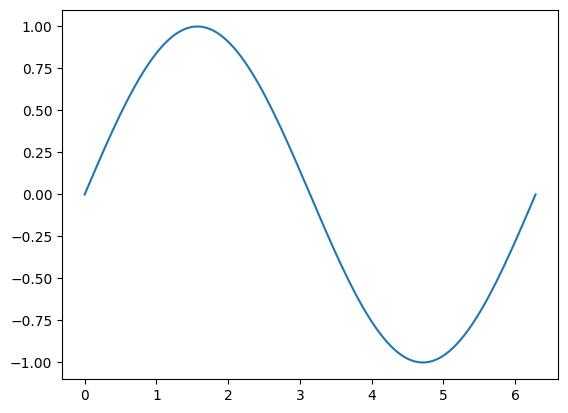

In [2]:
xx = np.linspace(0, 2*np.pi, 128)
f = lambda x: np.sin(x)

plt.plot(xx, f(xx))

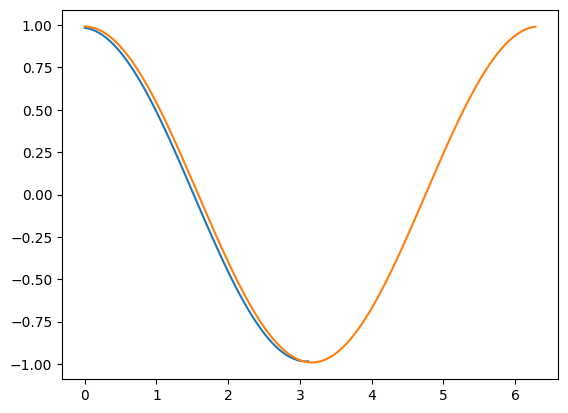

In [3]:
plt.plot(xx[:64], covariance_from_array(f(xx)))
plt.plot(xx, covariance_from_array(f(xx), True))

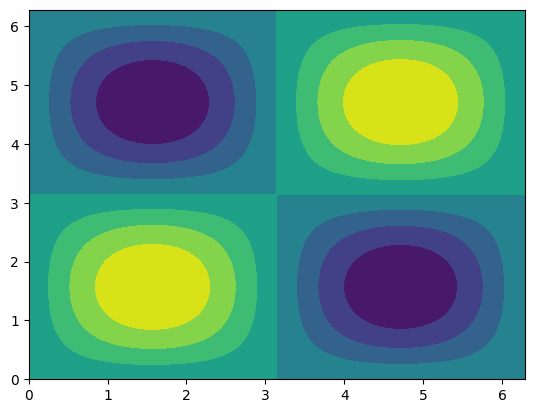

In [6]:
yy = xx
data_2d = f(xx)[:, np.newaxis] * f(yy)[np.newaxis, :]
plt.contourf(xx, yy, data_2d)

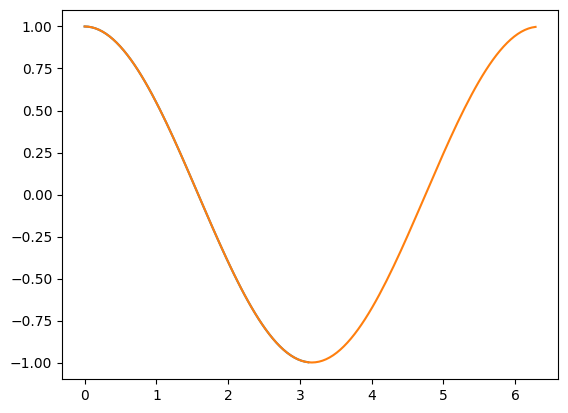

In [5]:
plt.plot(xx[:64], covariance_from_array(data_2d))
plt.plot(xx, covariance_from_array(data_2d, True))

In [7]:
err = []
for ind, array in enumerate(data_2d):
    err.append(np.array( covariance_from_array(array, True)))

/Users/user/Documents/Projects/python_util/.venv/lib/python3.9/site-packages/python_utils-0.1.0-py3.9.egg/pyutils/data_utils.py:14: RuntimeWarning: invalid value encountered in divide
  cov = array * np.roll(array, step) /rms/rms


In [33]:
halflen = int(np.floor(np.shape(data_2d)[0]/2))
print(halflen)
data_2d = np.arange(16).reshape(4, 4)
print(data_2d)
data_norm = data_2d - data_2d[halflen::, :].mean(axis = 0)[np.newaxis, :]
print(data_2d[halflen::, :])
print(data_2d[halflen::, :].mean(axis = 0))
print(data_norm)
data_rms = np.std(data_2d[halflen::, :], ddof = 1, axis=0)

2
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 8  9 10 11]
 [12 13 14 15]]
[10. 11. 12. 13.]
[[-10. -10. -10. -10.]
 [ -6.  -6.  -6.  -6.]
 [ -2.  -2.  -2.  -2.]
 [  2.   2.   2.   2.]]


In [16]:
halflen = int(np.floor(np.shape(data_2d)[0]/2))
array = data_2d - data_2d[:, halflen::].mean()
rms = np.std(array[halflen::], ddof = 1)
err = []
# rms = np.sqrt(np.sum(data[halflen::]**2)/(halflen-1))
for step in range(len(array)- halflen):
    cov = array * np.roll(array, step) /rms/rms
    err.append(np.average(cov[halflen::]))

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 array([ 9.92187500e-01,  9.90973475e-01,  9.87372586e-01,  9.81393551e-01,
         9.73050815e-01,  9.62364514e-01,  9.49360427e-01,  9.34069916e-01,
         9.16529844e-01,  8.96782494e-01,  8.74875462e-01,  8.50861544e-01,
         8.24798608e-01,  7.96749454e-01,  7.66781